In [1]:
#importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

%matplotlib inline 
pd.set_option('display.max_columns', None) #best practice to view all columns later

In [2]:
url = '/Users/debbie/Downloads/amz_uk_price_prediction_dataset.csv'
data = pd.read_csv(url)
df = data.copy()

# Part 1: Analyzing Best-Seller Trends Across Product Categories

## Crosstab Analysis:

    Create a crosstab between the product category and the isBestSeller status.

    Are there categories where being a best-seller is more prevalent?

    Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.



In [3]:
result = pd.crosstab(df['category'], df['isBestSeller']).sort_values(ascending=False, by=True)
result = result[result[True] > 0] #filter out who had no bestsellers
result['Proportion'] = result[True] / (result[True] + result[False]) #calculate percentage
result['Proportion'] = result['Proportion'].round(2) #round percentage
result = result.sort_values(ascending=False, by='Proportion') #sort by highest bestseller percentage
result


isBestSeller,False,True,Proportion
category,,,
Health & Personal Care,9017,552,0.06
Grocery,9008,556,0.06
Smart Home Security & Lighting,98,6,0.06
Power & Hand Tools,8353,306,0.04
Mobile Phone Accessories,248,11,0.04
...,...,...,...
"Inflatable Beds, Pillows & Accessories",253,1,0.00
Gifts for Him,437,1,0.00
Camcorders,487,1,0.00


In [4]:
print(f"Bestseller is more prevelant in these categories: {', '.join(map(str, result.head().index))}") 


Bestseller is more prevelant in these categories: Health & Personal Care, Grocery, Smart Home Security & Lighting, Power & Hand Tools, Mobile Phone Accessories


## Statistical Tests:

    Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    Compute Cramér's V to understand the strength of association between best-seller status and category.

In [5]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

In [6]:
# Chi-square test 
_, chi2_pvalue, _, _ = chi2_contingency(crosstab)

In [7]:
chi2_pvalue

0.0

In [8]:
# Check if the chi2_pvalue is smaller than 0.5
float(chi2_pvalue) < 0.05

True

The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the 0( p )-value, we reject the null hypothesis. This implies that there's a significant association between category and Bestseller in the dataset.

In [9]:
cramer = association(crosstab, method='cramer')
cramer

0.1222829439760564

In [10]:
print(f"The Cramer valuer of {cramer:.2f} suggests a weak association between two variables")

The Cramer valuer of 0.12 suggests a weak association between two variables


### Visualizations:
Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

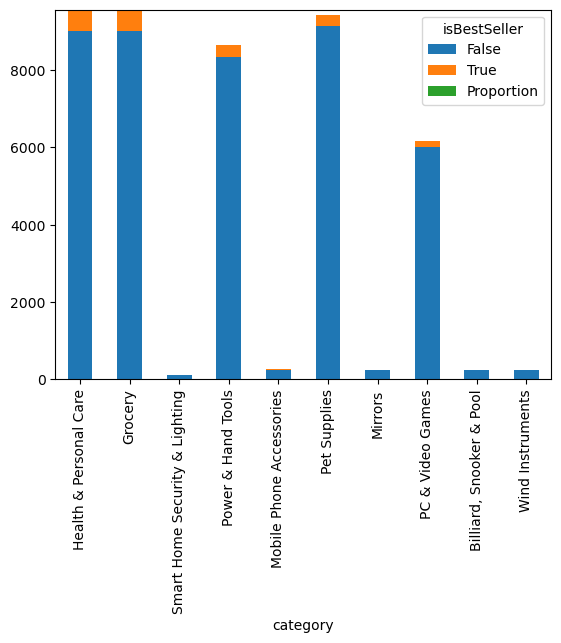

In [11]:
result.head(10).plot(kind='bar', stacked=True)
plt.show()

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

### Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.


In [12]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = (Q3 - Q1)
    
# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
# Identify the outliers
df_new = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
    

In [13]:
len(df)

2443651

In [14]:
len(df_new)

2115963

### Violin Plots:

    Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
    Which product category tends to have the highest median price? Don't filter here by top categories.


In [15]:
top_20_categories = df_new['category'].value_counts().head(20).index
top_20_df = df_new[df_new['category'].isin(top_20_categories)]

/var/folders/pm/ddtx28cd2hn37jlq10mrtz700000gn/T/ipykernel_67710/1236946901.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_20_df, x="category", y="price", palette="coolwarm")


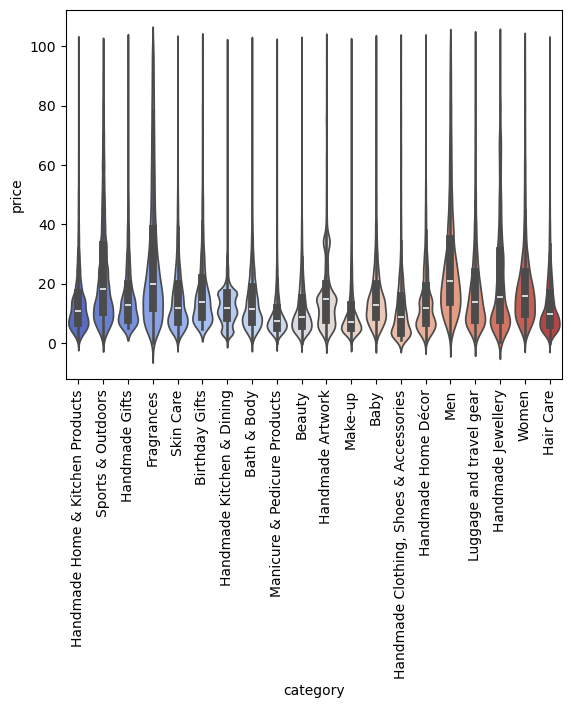

In [17]:
sns.violinplot(data=top_20_df, x="category", y="price", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [59]:
top_median = top_20_df.groupby('category')['price'].median().reset_index()
print(f"The top median price products are: {top_median.sort_values(by='price', ascending=False)['category'].iloc[:2]}")

The top median price products are: 16           Men
4     Fragrances
Name: category, dtype: object


### Bar charts

 Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
 Which product category commands the highest average price? Don't filter here by top categories.


In [ ]:
df = df_new
df__group = df.groupby("category").agg(avg_price=('price', 'mean'),product_count=('price', 'size')).reset_index()
df__group = df__group.sort_values(by='product_count', ascending=False)

/var/folders/pm/ddtx28cd2hn37jlq10mrtz700000gn/T/ipykernel_67710/2303394667.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


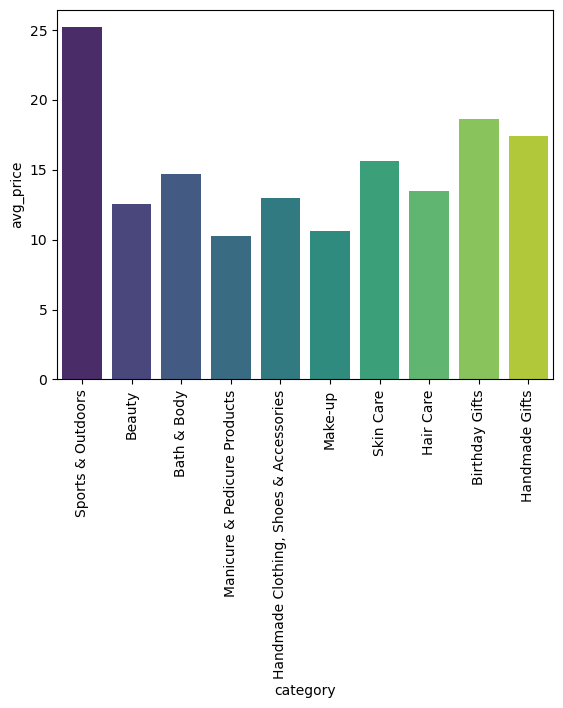

In [23]:
sns.barplot(
    x='category',
    y='avg_price',
    data=df__group.head(10),
    palette='viridis',
)
plt.xticks(rotation=90)
plt.show()

In [24]:
df_avg_price = df__group.sort_values(by='avg_price', ascending=False)

In [25]:
(df_avg_price.iloc[:1]["category"])

190    Motherboards
Name: category, dtype: object

In [26]:
df_avg_price

,category,avg_price,product_count
190,Motherboards,68.772432,74
34,Boxing Shoes,67.417803,3873
75,Desktop PCs,66.915562,169
274,Tablets,66.552971,4638
108,Graphics Cards,65.103509,57
...,...,...,...
22,Bedding Accessories,8.835220,205
4,Adapters,8.750197,254
246,Signs & Plaques,8.210513,5279
8,Arts & Crafts,8.006540,9538


In [27]:
print(f"THe product category with the highest average price is {(df_avg_price.iloc[:1]["category"])} with an average price of {(df_avg_price.iloc[:1]["avg_price"])}")

THe product category with the highest average price is 190    Motherboards
Name: category, dtype: object with an average price of 190    68.772432
Name: avg_price, dtype: float64


The product category with the highest average price is Laptops with an average price of 1087

### Box Plots:

    Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    Which category tends to receive the highest median rating from customers? Don't filter here by top categories.



In [28]:
df_rat_distr = df.groupby("category")["stars"].describe().reset_index().sort_values(by='count', ascending=False)

In [29]:
df_ten = df_rat_distr.head(10)

In [30]:
df_rat_distr

,category,count,mean,std,min,25%,50%,75%,max
262,Sports & Outdoors,694092.0,0.777733,1.674259,0.0,0.0,0.0,0.000,5.0
20,Beauty,19233.0,4.325799,0.536974,0.0,4.2,4.4,4.600,5.0
16,Bath & Body,19050.0,3.985517,1.310223,0.0,4.1,4.4,4.600,5.0
177,Manicure & Pedicure Products,18904.0,3.740542,1.421991,0.0,3.8,4.2,4.500,5.0
116,"Handmade Clothing, Shoes & Accessories",18811.0,1.072436,1.960754,0.0,0.0,0.0,0.000,5.0
...,...,...,...,...,...,...,...,...,...
138,Home Entertainment,57.0,3.894737,0.821023,0.0,3.7,4.0,4.300,5.0
255,Smart Speakers,49.0,2.920408,2.258224,0.0,0.0,4.5,4.700,5.0
6,Alexa Built-In Devices,39.0,4.156410,0.262373,3.1,4.1,4.2,4.300,4.6
0,3D Printers,36.0,2.772222,2.038432,0.0,0.0,4.1,4.400,5.0


In [31]:
df_plot = df[df['category'].isin(df_ten['category'])]

/var/folders/pm/ddtx28cd2hn37jlq10mrtz700000gn/T/ipykernel_67710/1900997852.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x="category", y="stars", palette="coolwarm")


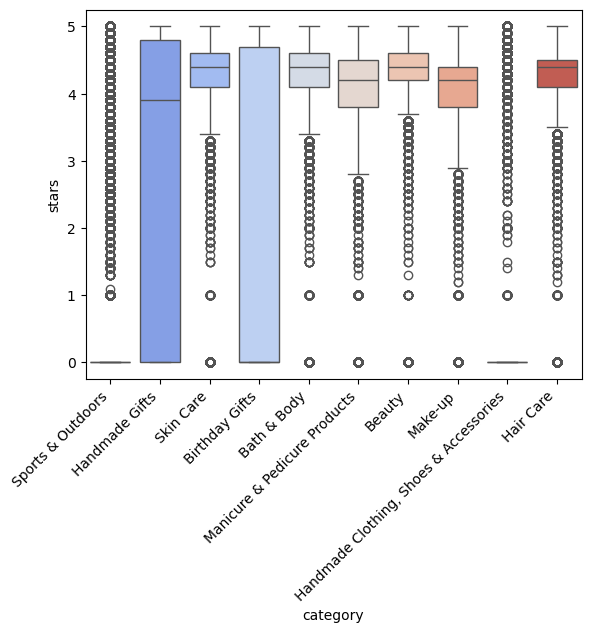

In [32]:
sns.boxplot(data=df_plot, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
df_rating = df.groupby("category").agg(avg_rating=('stars', 'mean'),rating_count=('stars', 'size')).reset_index()

In [34]:
df_rating = df_rating.sort_values(by='rating_count', ascending=False)

In [35]:
df_rating

,category,avg_rating,rating_count
262,Sports & Outdoors,0.777733,694092
20,Beauty,4.325799,19233
16,Bath & Body,3.985517,19050
177,Manicure & Pedicure Products,3.740542,18904
116,"Handmade Clothing, Shoes & Accessories",1.072436,18811
...,...,...,...
138,Home Entertainment,3.894737,57
255,Smart Speakers,2.920408,49
6,Alexa Built-In Devices,4.156410,39
0,3D Printers,2.772222,36


In [36]:
df.groupby("category")["stars"].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
3D Printers,36.0,2.772222,2.038432,0.0,0.000,4.1,4.4,5.0
3D Printing & Scanning,3253.0,0.094067,0.637761,0.0,0.000,0.0,0.0,5.0
Abrasive & Finishing Products,247.0,4.119433,1.150657,0.0,4.200,4.5,4.6,5.0
Action Cameras,1072.0,1.280131,1.829585,0.0,0.000,0.0,3.4,5.0
Adapters,254.0,4.142520,0.956486,0.0,4.100,4.4,4.5,5.0
...,...,...,...,...,...,...,...,...
Wind Instruments,118.0,3.524576,1.590728,0.0,3.225,4.1,4.5,5.0
Window Treatments,237.0,4.102954,1.081642,0.0,4.200,4.4,4.5,5.0
Women,17476.0,4.167733,0.651535,0.0,4.000,4.3,4.5,5.0


In [37]:
df.groupby("category")["stars"].median().reset_index().sort_values(by='stars', ascending=False)

,category,stars
56,Computer Memory,4.7
157,Kids' Play Figures,4.6
25,"Beer, Wine & Spirits",4.6
209,Office Paper Products,4.6
174,Luxury Food & Drink,4.6
...,...,...
58,Computer Printers,0.0
59,Computer Screws,0.0
60,"Computers, Components & Accessories",0.0
129,Hi-Fi Receivers & Separates,0.0


The product category with the highest median rating is "Computer Memory" with a median rating of 4.7

# Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

### Correlation Coefficients:

    Calculate the correlation coefficient between price and stars.
    Is there a significant correlation between product price and its rating?



In [38]:
df['price'].corr(df['stars']) # PEARSON

-0.07767299878181352

In [39]:
df['price'].corr(df['stars'], method="spearman") # Spearman

-0.06679697280768393

There is no significant linear or monotonic relationship between price and stars.

# Visualizations:

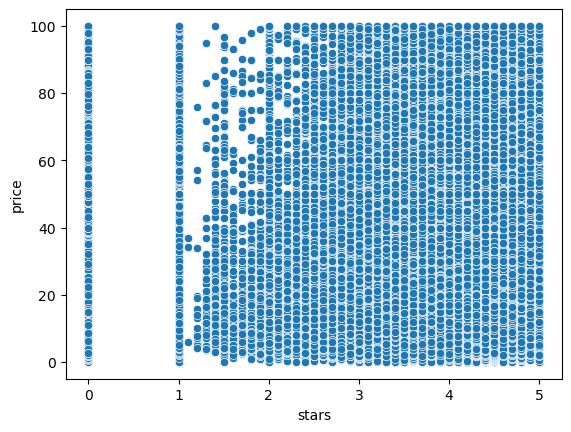

In [40]:
sns.scatterplot(data=df, x='stars', y='price')
plt.show()

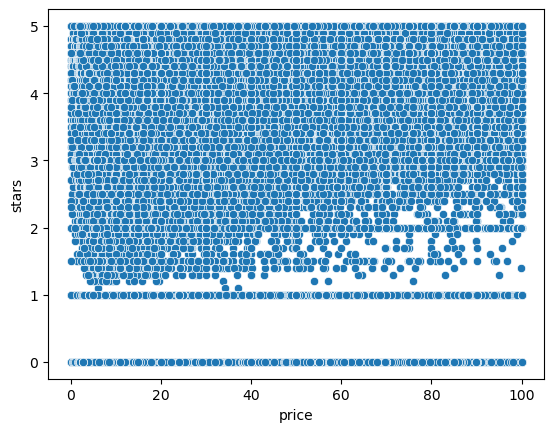

In [41]:
sns.scatterplot(data=df, x='price', y='stars')
plt.show()

I can observe there is no pattern between price and stars. Unless you want to call it a pattern tehre is no price that has 0.5 stars.

Use a correlation heatmap to visualize correlations between all numerical variables.

In [42]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [44]:
num = df.select_dtypes(include="number")
cat_from_num = num.loc[:, num.nunique() < 20]
num = num.drop(columns=cat_from_num.columns)
num.corr()

,uid,stars,reviews,price,boughtInLastMonth
uid,1.000000,0.030288,0.020236,0.001717,0.017116
stars,0.030288,1.000000,0.083920,-0.077673,0.113994
reviews,0.020236,0.083920,1.000000,-0.008498,0.105624
price,0.001717,-0.077673,-0.008498,1.000000,-0.059051
boughtInLastMonth,0.017116,0.113994,0.105624,-0.059051,1.000000


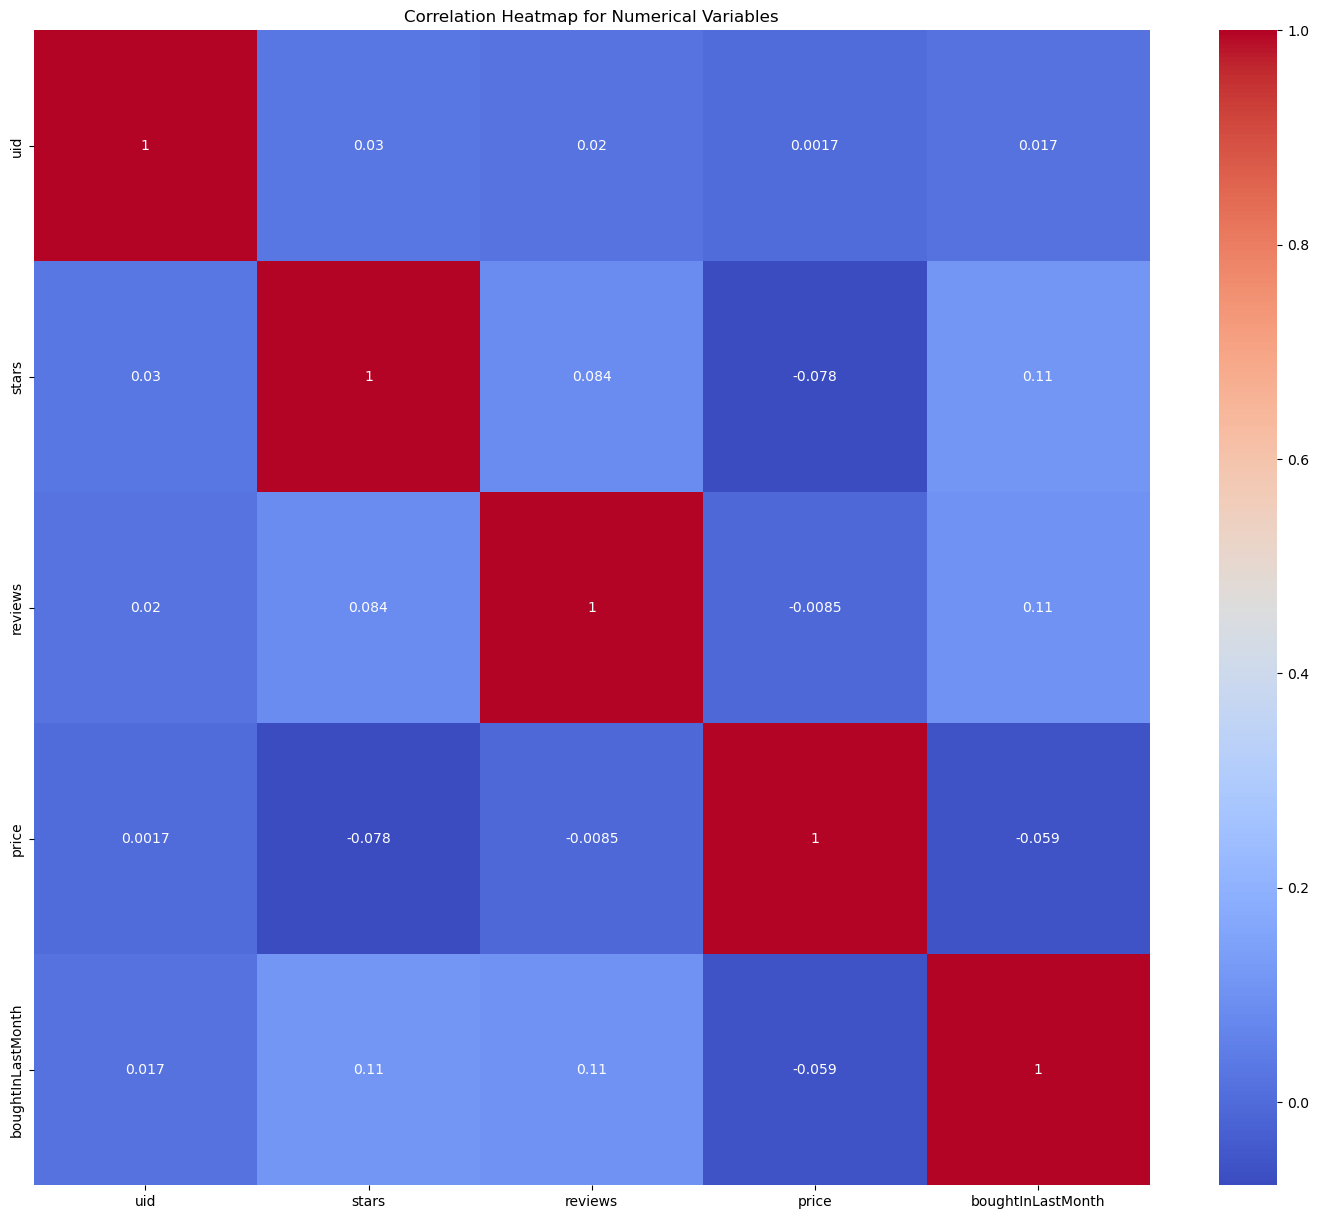

In [45]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(num.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

Examine if product prices typically follow a normal distribution using a QQ plot.

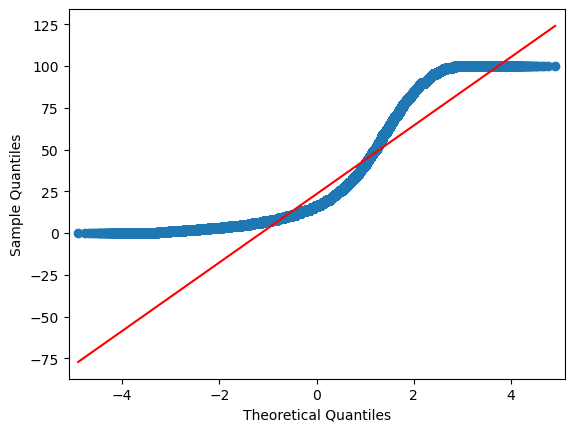

In [46]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');
plt.show()

Price does not follow a normal distribution